# Heart Disease UCI
- https://www.kaggle.com/ronitf/heart-disease-uci

## Attribute Information:
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("data/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## 請觀察各個欄位的值分布

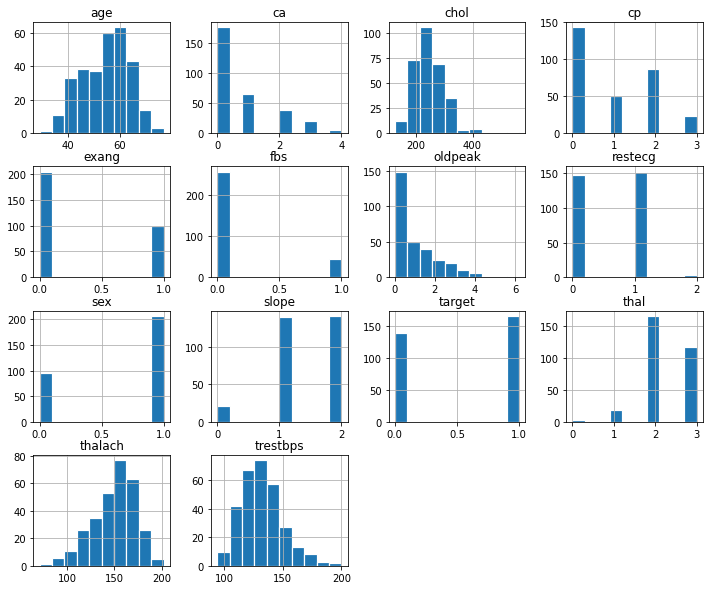

In [10]:
# 使用直方圖顯示每個欄位的值域的數量分布
import matplotlib.pyplot as plt

data.hist(edgecolor='white', linewidth=1.2)   #間隔線與寬度
fig=plt.gcf()  # Get the current figure.
fig.set_size_inches(12,10)
plt.show()

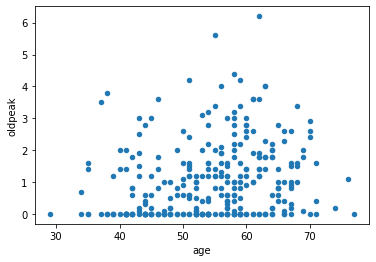

In [13]:
# 先使用兩個欄位來簡單看一下資料的分布
# 使用pandas內建的方式
data.plot(kind="scatter", x="age", y="oldpeak")

## 請畫出欄位之間的相關性並列出跟預測值相關性高的三組欄位

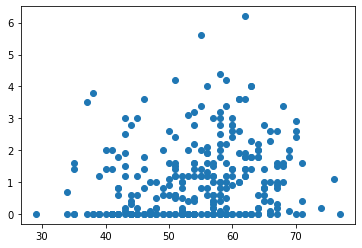

In [15]:
# 使用matplotlib畫跟上面一樣的圖
plt.scatter(data['age'], data['oldpeak'])

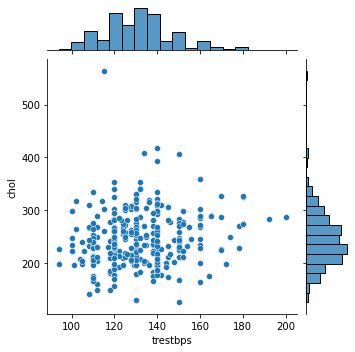

In [18]:
# seaborn是一個可以搭配pandas使用的圖形視覺化工具
import seaborn as sns

# 畫出跟上面一樣的圖，但是多了欄位值數量的分布
sns.jointplot(x="trestbps", y="chol", data=data, height=5)

## 請將資料分成測試與訓練組

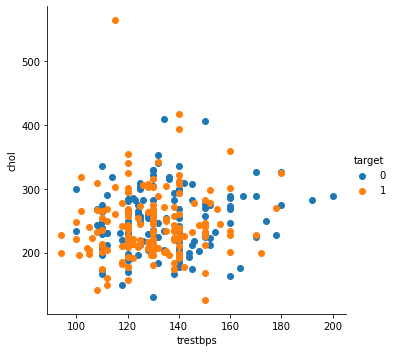

In [22]:
# 將不同類別的資料加入顏色
sns.FacetGrid(data, hue="target", height=5) \
   .map(plt.scatter, "trestbps", "chol").add_legend()

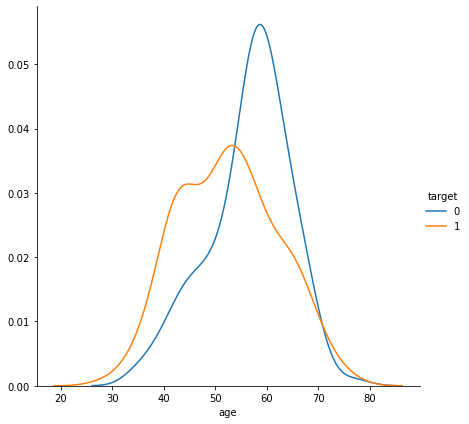

In [21]:
# 加上類別指示
sns.FacetGrid(data, hue="target", height=6) \
    .map(sns.kdeplot, "age") \
    .add_legend()

## 建立幾個分類模型來進行分類預測

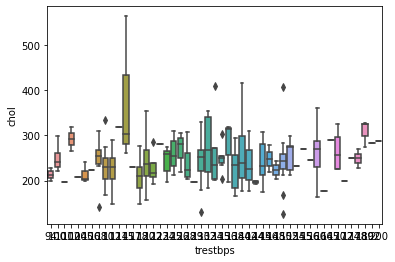

In [27]:
# 箱型圖
sns.boxplot(x="trestbps", y="chol", data=data)
# 結合箱型圖跟點分布圖
ax = sns.boxplot(x="trestbps", y="chol", data=data)
ax = sns.stripplot(x="trestbps", y="chol", data=data, jitter=True, edgecolor="gray")

In [30]:
# 畫出兩兩欄位對應的點分布圖，用來觀看那些維度容易分離資料
sns.PairGrid(data.drop("Id", axis=1), hue="target").map(plt.scatter).add_legend()

KeyError: "['Id'] not found in axis"